In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind_from_stats
import scipy.stats as stats 

# Load the necessary packages

In [2]:
df_ins=pd.read_csv('insurance.csv')

# Load the Insurance Dataset

In [3]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_ins.shape

# shape of the data with 1338 rows and 7 columns

(1338, 7)

In [5]:
df_ins.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
df_ins.info()

## datatype of each attribute as per information displayed below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.5+ KB


In [7]:
df_ins.isnull()

## There are no missing values in the data

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [8]:
df_ins.isnull().sum()

## checking the presence of missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df_ins.describe()

## details of numerical attributes only

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df_ins.sex.drop_duplicates()) 
df_ins.sex = le.transform(df_ins.sex)
# smoker or not
le.fit(df_ins.smoker.drop_duplicates()) 
df_ins.smoker = le.transform(df_ins.smoker)
#region
le.fit(df_ins.region.drop_duplicates()) 
df_ins.region = le.transform(df_ins.region)

## Female is labelled as 0 and Male as 1
## Smoker(Yes) is taken as 1 and Smoker(No)is taken as 0

In [11]:
df_ins.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [12]:
##The five point summary is denoted by minimum(min), the first quartile(Q1-25% ) value, the median(at 50%), 
##the third quartile(Q3) value and the maximum(max)

print(df_ins['age'].min())
print(df_ins['age'].max())
print(df_ins['age'].median())
Q1 = df_ins['age'].quantile(0.25)
Q3 = df_ins['age'].quantile(0.75)
print(Q1)
print(Q3)

## age is a numerical attribute and hence 5 point summary is shows as below . Visual representation in the form of box plot 
## of age is shown below when outliers are identified using box and whisker plot which is also pictorial representation of
## five point summary of this attribute

18
64
39.0
27.0
51.0


In [13]:
##The five point summary is denoted by minimum(min), the first quartile(Q1-25% ) value, the median(at 50%), 
##the third quartile(Q3) value and the maximum(max)

print(df_ins['bmi'].min())
print(df_ins['bmi'].max())
print(df_ins['bmi'].median())
Q1 = df_ins['bmi'].quantile(0.25)
Q3 = df_ins['bmi'].quantile(0.75)
print(Q1)
print(Q3)

## bmi is a numerical attribute and hence 5 point summary is shows as below . Visual representation in the form of box plot 
## of bmi is shown below when outliers are identified using box and whisker plot which is also pictorial representation of
## five point summary of this attribute

15.96
53.13
30.4
26.29625
34.69375


In [14]:
##The five point summary is denoted by minimum(min), the first quartile(Q1-25% ) value, the median(at 50%), 
##the third quartile(Q3) value and the maximum(max)

print(df_ins['children'].min())
print(df_ins['children'].max())
print(df_ins['children'].median())
Q1 = df_ins['children'].quantile(0.25)
Q3 = df_ins['children'].quantile(0.75)
print(Q1)
print(Q3)

## children is a numerical attribute and hence 5 point summary is shows as below . 

0
5
1.0
0.0
2.0


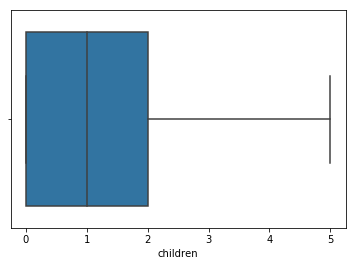

In [15]:
sns.boxplot(x=df_ins['children'])
## children is shown below as pictorial representation of five point summary of this attribute

In [16]:
##The five point summary is denoted by minimum(min), the first quartile(Q1-25% ) value, the median(at 50%), 
##the third quartile(Q3) value and the maximum(max)

print(df_ins['charges'].min())
print(df_ins['charges'].max())
print(df_ins['charges'].median())
Q1 = df_ins['charges'].quantile(0.25)
Q3 = df_ins['charges'].quantile(0.75)
print(Q1)
print(Q3)

## charges is a numerical attribute and hence 5 point summary is shows as below . 
##Visual representation in the form of box plot of charges is shown below when outliers are identified using box and 
##whisker plot which is also pictorial representation of five point summary of this attribute

1121.8739
63770.42801
9382.033
4740.28715
16639.912515


In [18]:
df_ins.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [19]:
print(df_ins['bmi'].std())
print(df_ins['bmi'].mean())

## distribution of bmi using mean and std, checking the overlap of median and mean in describe function and 
##representing the same pictorially as per below graphs

6.09818691168
30.663396861


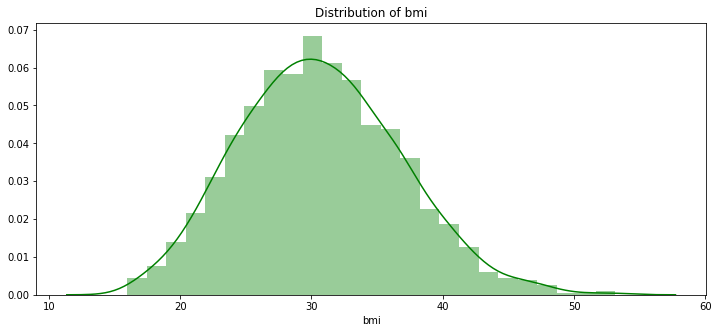

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df_ins["bmi"], color = 'g')

#### 15.96 is the minimum bmi of patients in our data set.The maximum bmi is 53.13
## Measure of skewness , mean and median of the bmi column are over lapping and so the distribution is close to normal

In [21]:
df_ins['bmi'].skew()

## checking the skew in bmi column

0.2840471105987448

In [22]:
print(df_ins['age'].std())
print(df_ins['age'].mean())

## distribution of age using mean and std, checking the overlap of mean and median in describe function and 
##representing the same pictorially as per below graphs

14.0499603792
39.2070254111


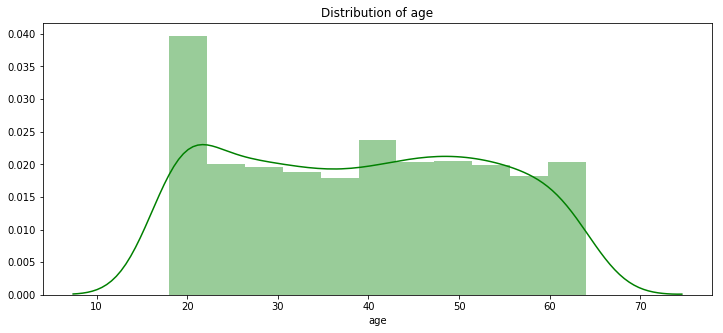

In [23]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df_ins["age"], color = 'g')

##We have patients under 20 in our data set. 18 years old is the minimum age of patients in our data set
##The maximum age is 64 years

## measure of skewness, mean and medain are once again almost over lapping, long tails are not seen 

In [34]:
df_ins['age'].skew()

## checking the skew in age column

0.05567251565299186

In [24]:
print(df_ins['charges'].std())
print(df_ins['charges'].mean())

## distribution of charges using mean and std, checking the overlap of mean and median in describe function 
##and representing the same pictorially as per below graphs

12110.0112367
13270.4222651


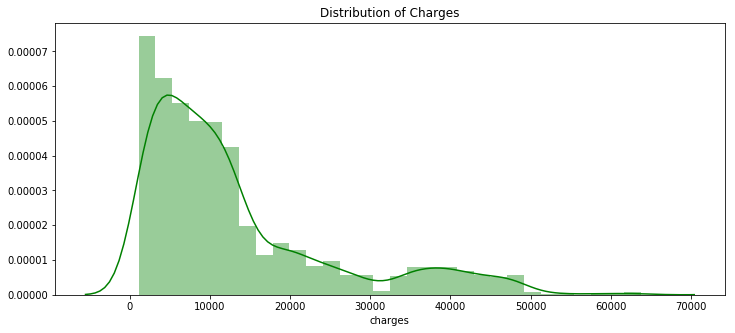

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Charges")
ax = sns.distplot(df_ins["charges"], color = 'g')

## minimum charges 1121 and max charges 63770, distribution is right skewed due to significant difference in mean and median 
## values hence long tail can be seen towards the right(Q3-max) to be compared with (Q1-min) i.e 63770-16339, and 4740-1121
## there is clear indication of potential outliers in this column of charges due to huge difference 

In [37]:
df_ins['charges'].skew()

## checking the skew in charges column

1.5158796580240388

In [26]:
z_bmi = np.abs(stats.zscore(df_ins['bmi'])) ## checking the presence of outliers in bmi column using z-score


In [27]:
z_bmi ## checking the presence of outliers in bmi column using z-score

array([0.45332   , 0.5096211 , 0.38330685, ..., 1.0148781 , 0.79781341,
       0.26138796])

In [28]:
Q1 = df_ins['bmi'].quantile(0.25)
Q3 = df_ins['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)## IQR can also be used to check the presence of outliers 

8.3975


In [29]:
print(df_ins['bmi'] < (Q1 - 1.5 * IQR)) |(df_ins['bmi'] > (Q3 + 1.5 * IQR))

## code has given output with True and False values on BMI column. False values mean valid values while True values indicate
## presence of outliers

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1308    False
1309    False
1310    False
1311    False
1312    False
1313    False
1314    False
1315    False
1316    False
1317     True
1318    False
1319    False
1320    False
1321    False
1322    False
1323    False
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
1336    False
1337    False
Name: bmi, Length: 1338, dtype: bool


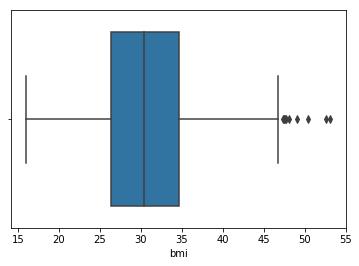

In [30]:
sns.boxplot(x=df_ins['bmi'])

## checking the presence of outliers in bmi column using box plots


In [31]:
z_age = np.abs(stats.zscore(df_ins['age'])) ## checking the presence of outliers in age column using z-score

In [32]:
z_age ## checking the presence of outliers in age column using z-score

array([1.43876426, 1.50996545, 0.79795355, ..., 1.50996545, 1.29636188,
       1.55168573])

In [33]:
Q1 = df_ins['age'].quantile(0.25)
Q3 = df_ins['age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)## IQR can also be used to check the presence of outliers

24.0


In [34]:
print(df_ins['age'] < (Q1 - 1.5 * IQR)) |(df_ins['age'] > (Q3 + 1.5 * IQR))

## code has given output with True and False values on age column. False values mean valid values while True values indicate
## presence of outliers

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1308    False
1309    False
1310    False
1311    False
1312    False
1313    False
1314    False
1315    False
1316    False
1317    False
1318    False
1319    False
1320    False
1321    False
1322    False
1323    False
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
1336    False
1337    False
Name: age, Length: 1338, dtype: bool


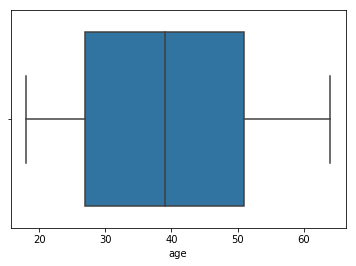

In [35]:
sns.boxplot(x=df_ins['age'])

## checking the presence of outliers in age column using box plots

In [36]:
z_charges = np.abs(stats.zscore(df_ins['charges'])) ## checking the presence of outliers in charges column using z-score

In [37]:
z_charges ## checking the presence of outliers in charges column using z-score

array([0.2985838 , 0.95368917, 0.72867467, ..., 0.96159623, 0.93036151,
       1.31105347])

In [38]:
Q1 = df_ins['charges'].quantile(0.25)
Q3 = df_ins['charges'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)## IQR can also be used to check the presence of outliers

11899.625365


In [39]:
print(df_ins['charges'] < (Q1 - 1.5 * IQR)) |(df_ins['charges'] > (Q3 + 1.5 * IQR))

## code has given output with True and False values on age column. False values mean valid values while True values indicate
## presence of outliers

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14       True
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22      False
23       True
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
1308    False
1309    False
1310    False
1311    False
1312    False
1313     True
1314    False
1315    False
1316    False
1317    False
1318    False
1319    False
1320    False
1321    False
1322    False
1323     True
1324    False
1325    False
1326    False
1327    False
1328    False
1329    False
1330    False
1331    False
1332    False
1333    False
1334    False
1335    False
1336    False
1337    False
Name: charges, Length: 1338, dtype: bool


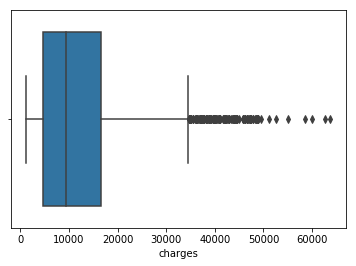

In [40]:
sns.boxplot(x=df_ins['charges'])

## checking the presence of outliers in charges column using box plots

In [41]:
## distribution of categorical columns including children
pd.crosstab(df_ins['sex'],df_ins['children'] )

children,0,1,2,3,4,5
sex,,,,,,
0,289,158,119,77,11,8
1,285,166,121,80,14,10


In [42]:
df_children=df_ins.pivot_table(columns='children',values='sex',aggfunc='count')

In [43]:
df_children

children,0,1,2,3,4,5
sex,574,324,240,157,25,18


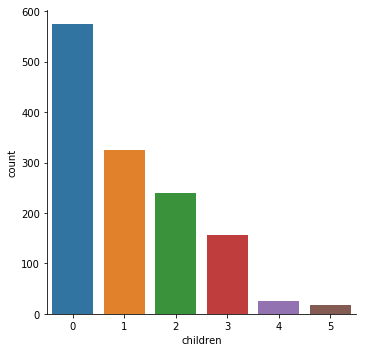

In [44]:
sns.catplot(x='children', kind='count',data=df_ins)## distribution of categorical columns
## count of zero children is 574 which is maximum among the data and count of five children is 18 which is least.

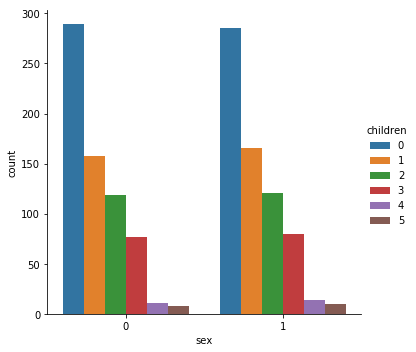

In [45]:
sns.catplot(x='sex', kind='count',data=df_ins,hue='children')

## equal distribution of men and women for count of children is depicted in graph below

In [46]:
pd.crosstab(df_ins['sex'],df_ins['smoker'] )

smoker,0,1
sex,,
0,547,115
1,517,159


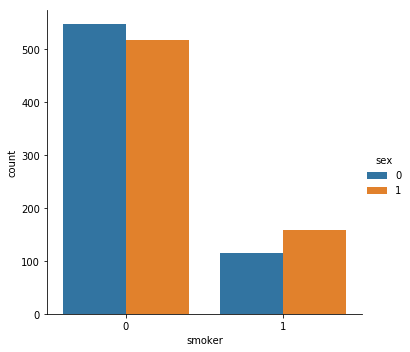

In [47]:
sns.catplot(x='smoker', kind='count',data=df_ins,hue='sex')

## distribution of categorical columns
## Female is labelled as 0 and Male as 1
## Smoker(Yes) is taken as 1 and Smoker(No)is taken as 0

## Number of men not smoking is less than that of women as shown in table above. Number of men smoking is more than number 
## of women. 

In [48]:
pd.crosstab(df_ins['smoker'],df_ins['children'] )

## distribution of categorical columns including children

children,0,1,2,3,4,5
smoker,,,,,,
0,459,263,185,118,22,17
1,115,61,55,39,3,1


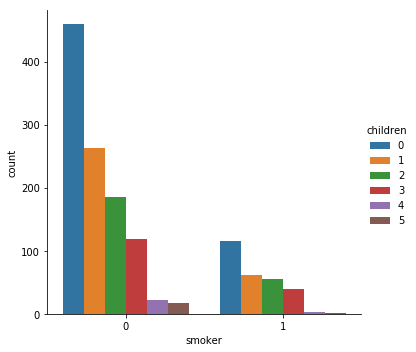

In [49]:
sns.catplot(x='smoker', kind='count',data=df_ins,hue='children')

## distribution of categorical columns including children
## distribution including children among smokers and non smokers is indicated below
## Smoker(Yes) is taken as 1 and Smoker(No)is taken as 0

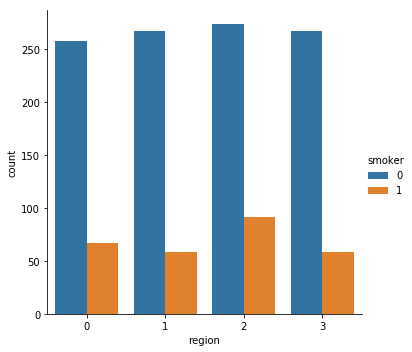

In [50]:
sns.catplot(x='region', kind='count',data=df_ins,hue='smoker')

## distribution of categorical columns

## Female is labelled as 0 and Male as 1
## Smoker(Yes) is taken as 1 and Smoker(No)is taken as 0

## Label 3 'south west'
## Label 2 ' south east'
## Label 1 ' north west '
## Label 0 ' north east'

## Smoker count is maximum is South East region followed by maximum smokers in North East region

In [51]:
pd.crosstab(df_ins['region'],df_ins['children'] )

## distribution of categorical columns including children

## Female is labelled as 0 and Male as 1
## Smoker(Yes) is taken as 1 and Smoker(No)is taken as 0

## Label 3 'south west'
## Label 2 ' south east'
## Label 1 ' north west '
## Label 0 ' north east

children,0,1,2,3,4,5
region,,,,,,
0,147,77,51,39,7,3
1,132,74,66,46,6,1
2,157,95,66,35,5,6
3,138,78,57,37,7,8


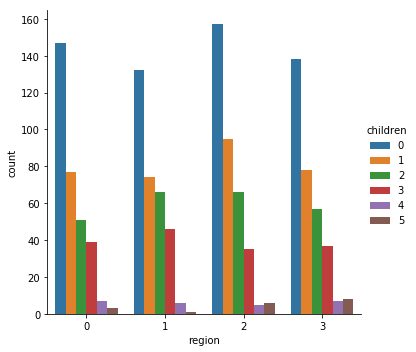

In [52]:
sns.catplot(x='region', kind='count',data=df_ins,hue='children')

## below plot showing distribution of children region wise 

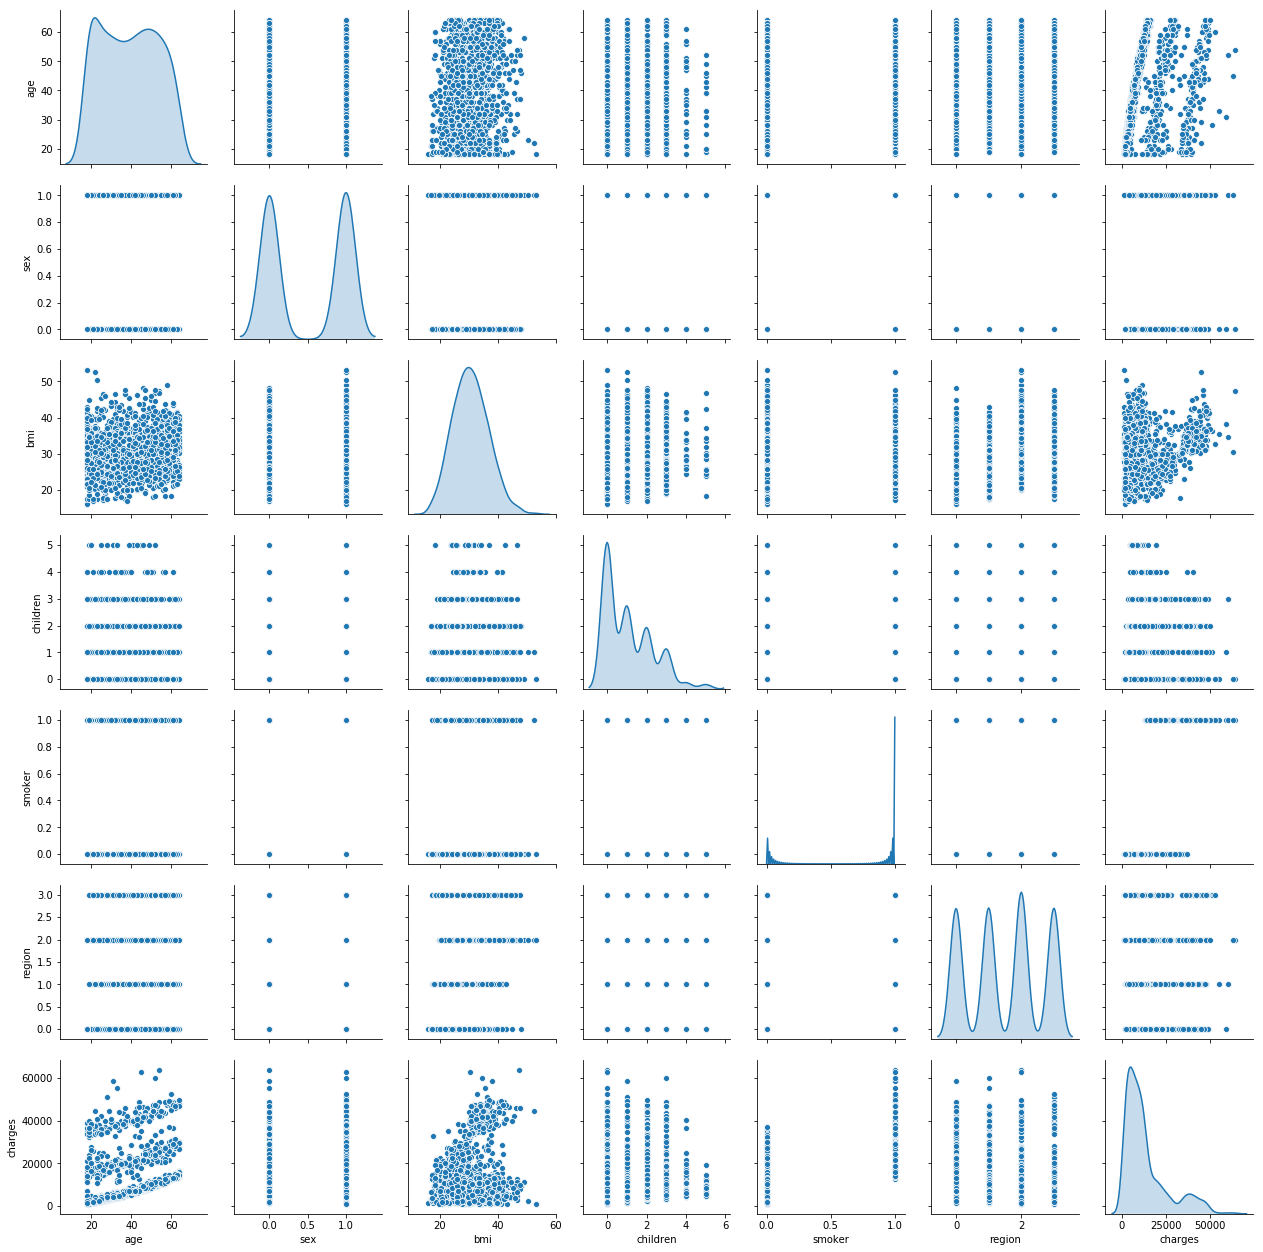

In [53]:
sns.pairplot(df_ins,diag_kind='kde')

## pairplot that includes all columns of the data frame

In [54]:
group_by=df_ins.groupby(['smoker','charges'])

## table showing charges of people who smoke and those who do not smoke

In [55]:
group_by.sum()

age  sex     bmi  children  region
smoker charges                                        
0      1121.87390    18    1  23.210         0       2
       1131.50660    18    1  30.140         0       2
       1135.94070    18    1  33.330         0       2
       1136.39940    18    1  33.660         0       2
       1137.01100    18    1  34.100         0       2
       1137.46970    18    1  34.430         0       2
       1141.44510    18    1  37.290         0       2
       1146.79660    18    1  41.140         0       2
       1149.39590    18    1  43.010         0       2
       1163.46270    18    1  53.130         0       2
       1241.56500    19    1  19.800         0       3
       1242.26000    19    1  20.300         0       3
       1242.81600    19    1  20.700         0       3
       1252.40700    19    1  27.600         0       3
       1253.93600    19    1  28.700         0       3
       1256.29900    19    1  30.400         0       3
       1261.44200    19    1  34.100         0       3
       1261.85900    19    1  34.400         0       3
       1263.24900    19    1  35.400         0       3
       1391.52870    20    1  33.330         0       2
       1515.34490    21    1  23.210         0       2
       1526.31200    21    1  31.100         0       3
       1532.46970    21    1  35.530         0       2
       1534.30450    21    1  36.850         0       2
       1607.51010    18    0  20.790         0       2
       1615.76670    18    0  26.730         0       2
       1621.34020    19    1  17.480         0       1
       1621.88270    18    0  31.130         0       2
       1622.18850    18    0  31.350         0       2
       1625.43375    19    1  20.425         0       1
...                 ...  ...     ...       ...     ...
1      46255.11250   51    0  37.050         3       0
       46599.10840   61    1  35.860         0       2
       46661.44240   53    0  36.860         3       1
       46718.16325   62    1  30.875         3       1
       46889.26120   64    1  33.880         0       2
       47055.53210   63    1  35.090         0       2
       47269.85400   52    1  41.800         2       2
       47291.05500   64    0  31.300         2       3
       47305.30500   63    0  32.200         2       3
       47403.88000   61    1  36.300         1       3
       47462.89400   51    1  42.900         2       2
       47496.49445   58    1  36.955         2       1
       47896.79135   59    0  36.765         1       0
       47928.03000   64    0  33.800         1       3
       48173.36100   60    1  39.900         0       3
       48517.56315   61    0  36.385         1       0
       48549.17835   54    1  40.565         3       0
       48673.55880   60    1  40.920         0       2
       48675.51770   57    1  42.130         1       2
       48824.45000   63    0  37.700         0       3
       48885.13561   44    0  38.060         0       2
       48970.24760   59    1  41.140         1       2
       49577.66240   64    1  36.960         2       2
       51194.55914   28    1  36.400         1       3
       52590.82939   60    1  32.800         0       3
       55135.40209   33    0  35.530         0       1
       58571.07448   31    0  38.095         1       0
       60021.39897   52    1  34.485         3       1
       62592.87309   45    1  30.360         0       2
       63770.42801   54    0  47.410         0       2

[1337 rows x 5 columns]

In [56]:
df_ins_charges=df_ins.pivot_table(columns='smoker',values='charges',aggfunc='sum')

## displays the total charges for smoker '0' (No) and '1' (Yes) class 

In [57]:
df_ins_charges.T

,charges
smoker,
0,8.974061e+06
1,8.781764e+06


In [58]:
df_ins_count=df_ins.pivot_table(columns='smoker',values='charges',aggfunc='count')

## displays the total count of customers for smoker '0' (No) and '1' (Yes) class . Looking at the box plot along with sum 
## and count of customers for smoker and non smoker class , it shows a considerable difference in charges between smokers
## and non smokers. Smokers are being charged a much higher amount on an average in comparison to non smokers

In [59]:
df_ins_count.T

,charges
smoker,
0,1064
1,274


In [145]:
## H0: charges of smokers and non smokers are same
## Ha: charges of smokers and non smokers are not same

smoker_charges = df_ins[df_ins['smoker'] == 1].charges  
nonsmoker_charges = df_ins[df_ins['smoker'] == 0].charges

In [146]:
t_statistic, p_value  =  stats.ttest_ind(smoker_charges,nonsmoker_charges)

In [147]:
t_statistic, p_value ## since p value <.05 there is significant difference in charges of people who smoke from the ones who
## do not smoke

(46.664921172723716, 8.271435842177219e-283)

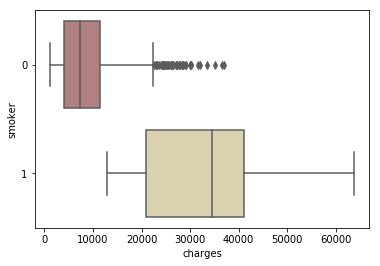

In [60]:
sns.boxplot(y="smoker", x="charges", data = df_ins, orient="h", palette = 'pink')#### there is significant difference in 
##charges of people who smoke from the ones who do not smoke as indicated pictorially 

In [61]:
df_ins_bmi=df_ins.pivot_table(columns='sex',values='bmi',aggfunc='sum')

In [62]:
df_ins_bmi

## bmi of males is different from females but not significantly different, just getting an overview from these values

sex,0,1
bmi,20110.07,20917.555


In [63]:
##Ho : Variation in bmi of men and women is equal 
##Ha : Variation in bmi of men is greater than it is in women/ bmi is different between men and women

female_bmi = df_ins[df_ins['sex'] == 0].bmi.value_counts()
male_bmi = df_ins[df_ins['sex'] == 1].bmi.value_counts()

In [67]:
t_statistic, p_value  =  stats.ttest_ind(female_bmi,male_bmi)

In [68]:
t_statistic, p_value ## since p value is >.05 indicating no significant difference between male and female bmi

(-1.0606564260800349, 0.28917022489580546)

In [69]:
##Ho : Variation in bmi of men and women is equal 
##Ha : Variation in bmi of men is greater than it is in women

## levene result can also be used to check the variances other than ttest as above, results are coming as same from both

stats.levene(female_bmi,male_bmi) ## since p value is >.05 indicating no significant difference between male and female bmi

LeveneResult(statistic=1.1249920541848726, pvalue=0.2891702248958167)

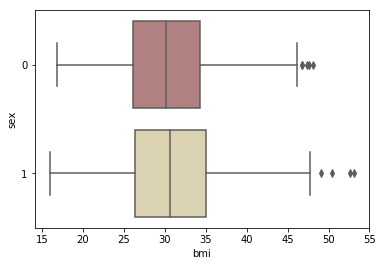

In [70]:
sns.boxplot(y="sex", x="bmi", data = df_ins, orient="h", palette = 'pink')

#### there is no significant difference in bmi of men and women as indicated pictorially 

In [71]:
pd.crosstab(df_ins['smoker'],df_ins['sex'] )

## value of 1 class represents smoker and 0 represents non smoker
## value of 0 class in sex represents female , 1 class in sex represents males 
## 115 female smoke in comparison to 159 males, number of male smokers is higher by 44 in comparison to that of females

sex,0,1
smoker,,
0,547,517
1,115,159


In [72]:
## 'sex' and 'smoker' are two categorical variables
## We want to see if the proportion of smokers in the female population is significantly different from smokers
## in male population

##Ho = The proportions are equal
## Ha = The two proportions are not equal

In [74]:
##female_smokers = df_ins[df_ins['sex'] == 0].smoker.sum()  # number of female smokers
##male_smokers = df_ins[df_ins['sex'] == 1].smoker.sum() # number of male smokers
##n_females = df_ins.sex.value_counts()[0] # number of females in the data
##n_males = df_ins.sex.value_counts()[1]

In [75]:
female_smokers = df_ins[df_ins['sex'] == 0].smoker.value_counts()[1]  # number of female smokers
male_smokers = df_ins[df_ins['sex'] == 1].smoker.value_counts()[1] # number of male smokers
n_females = df_ins.sex.value_counts()[0] # number of females in the data
n_males = df_ins.sex.value_counts()[1] #number of males in the data

In [76]:
print([female_smokers, male_smokers] , [n_females, n_males])

([115, 159], [662, 676])


In [77]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

In [78]:
stat,pval ## since p value is less than .05 reject null , hence two proportions are not equal hence difference is
## significant among female and male smokers

(-2.7867402154855503, 0.005324114164320532)

In [81]:
## new dataframe with female having 0, 1 and 2 children
df_female=df_ins[df_ins['sex']==0][(df_ins['children']==0)|(df_ins['children']==1)|(df_ins['children']==2)]

C:\Users\Ninky\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [82]:
df_female

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
9,60,0,25.840,0,0,1,28923.13692
11,62,0,26.290,0,1,2,27808.72510
13,56,0,39.820,0,0,2,11090.71780
16,52,0,30.780,1,0,0,10797.33620
20,60,0,36.005,0,0,0,13228.84695
21,30,0,32.400,1,0,3,4149.73600
23,34,0,31.920,1,1,0,37701.87680


In [83]:
bmi_child0=np.array(df_female[df_female['children']==0]['bmi'])
bmi_child1=np.array(df_female[df_female['children']==1]['bmi'])
bmi_child2=np.array(df_female[df_female['children']==2]['bmi'])

In [86]:
## H0 means that bmi of women with 0,1,2 children is same
## Ha means that bmi of women with 0,1,2 children is not same 

import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = df_female).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

## since p value is >.05 we fail to reject null which implies that there is no significant difference in bmi
## of women with 0,1,2 children

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


Text(0.5,1,'bmi distribution for women with 0, 1 and 2 children')

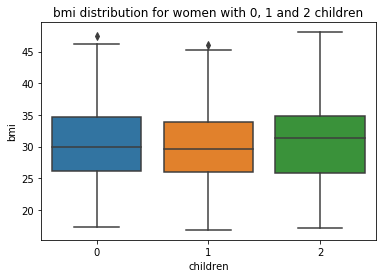

In [87]:
sns.boxplot(x='children',y='bmi',data=df_female)
plt.title('bmi distribution for women with 0, 1 and 2 children' )